# Geospatial data visualization

This notebook provides some geospatial visualization of our processed data.

In [1]:
# Import modules
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We will read in the data that we used to train our models
gdf_no2020_gt3crashes_train = gpd.read_file("../data/processed/geodatabases/cbg_no2020_gt3crashes_feature_select_and_transform_train.gdb")

In [3]:
gdf_no2020_gt3crashes_train

,census_block_group,CountHU,Pct_AO0,Pct_AO1,Pct_AO2p,D3A,D3AAO,D3AMM,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4B025,D4B050,D5AR,D5CRI,NatWalkInd,log_crash_per_density,geometry
0,88275.0,2.783904,-0.973617,0.450658,0.444079,1.372598,-3.000000,0.120057,-2.000000,-2.000000,1.371450,117.553322,70.531993,0.31008,0.938210,461465.0,0.644708,18.166667,-0.645986,"MULTIPOLYGON (((673228.34 2139484.41, 673226.9..."
1,101182.0,2.726727,-1.049732,0.251407,0.660413,1.255319,0.376403,0.232117,-2.000000,1.319656,-2.000000,59.618277,8.942742,0.00000,0.000000,89928.0,0.735541,8.833333,1.813636,"MULTIPOLYGON (((980241.945 1840714.636, 980384..."
2,133402.0,2.546543,-1.065330,0.619048,0.295918,1.283951,0.554499,0.691745,0.949677,1.426473,1.153615,32.025214,23.129321,0.00000,0.005278,159460.0,0.922273,14.833333,2.139057,"MULTIPOLYGON (((119354.213 1784988.02, 119363...."
3,19445.0,3.034628,-3.000000,0.133887,0.866113,1.231201,-3.000000,-0.910755,-2.000000,-2.000000,-2.000000,82.793246,16.198679,0.00000,0.000000,120659.0,0.276501,8.000000,0.693296,"MULTIPOLYGON (((1584423.363 1929631.803, 15844..."
4,66543.0,2.999565,-3.000000,0.186982,0.813018,1.105086,0.305414,-0.582288,0.728430,0.661619,-2.000000,34.334633,1.525984,0.00000,0.000000,36951.0,0.347241,6.666667,1.117480,"MULTIPOLYGON (((1398464.934 905161.766, 139847..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68045,68983.0,2.354108,-3.000000,0.393805,0.606195,1.367585,-3.000000,0.575998,-2.000000,0.905595,0.905595,112.507907,24.108837,0.00000,0.000000,134060.0,0.463656,14.333333,1.335733,"MULTIPOLYGON (((1577891.109 425032.623, 157793..."
68046,56557.0,3.051538,-3.000000,0.103884,0.896116,0.729817,-0.013746,-0.220079,0.188300,0.013614,-0.187988,10.665503,1.468902,0.00000,0.000000,36623.0,0.541816,6.666667,2.886632,"MULTIPOLYGON (((-763484.775 1940669.633, -7634..."
68047,65106.0,2.872156,-0.594082,0.319871,0.426494,1.197540,0.371817,0.476186,1.023594,0.877630,0.480553,48.220769,7.534495,0.00000,0.000000,66433.0,0.229763,14.000000,1.358829,"MULTIPOLYGON (((1584808.797 538535.063, 158480..."
68048,43287.0,2.716838,-1.408088,0.206413,0.755511,0.768051,0.163422,-0.149729,0.181924,0.423736,-0.701616,13.970118,1.321498,0.00000,0.000504,84324.0,0.303831,4.166667,3.272938,"MULTIPOLYGON (((-2243310.978 1976878.484, -224..."


<Axes: >

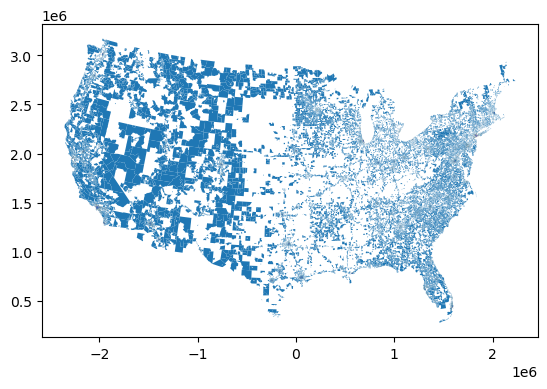

In [4]:
# Let's just make sure this looks about right
gdf_no2020_gt3crashes_train.plot()

In the above plot, we can see that all of our census block groups lie in the contiguous United States. 
The missing CBGs are those excluded via our data cleaning process, as well as those reserved for our testing set.

<Axes: >

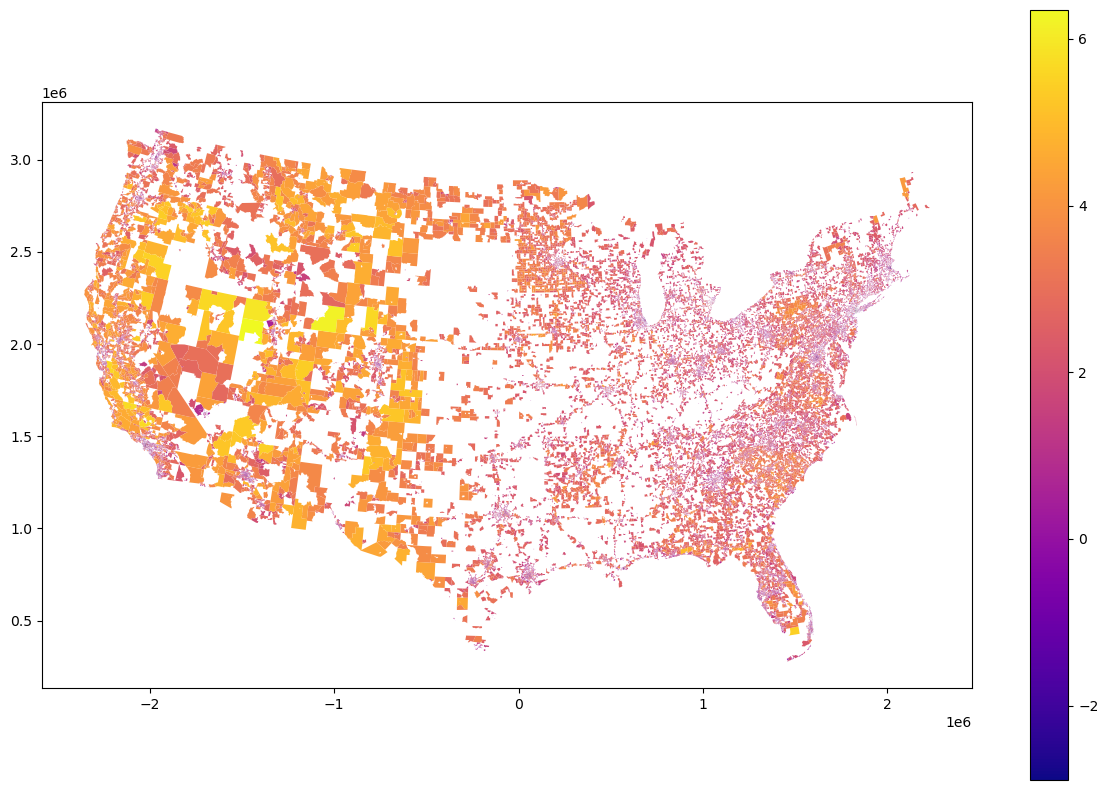

In [5]:
# Coloring by target variable
gdf_no2020_gt3crashes_train.plot(
    column="log_crash_per_density", 
    legend=True,
    cmap="plasma",
    figsize=(15,10)
    )

<Axes: >

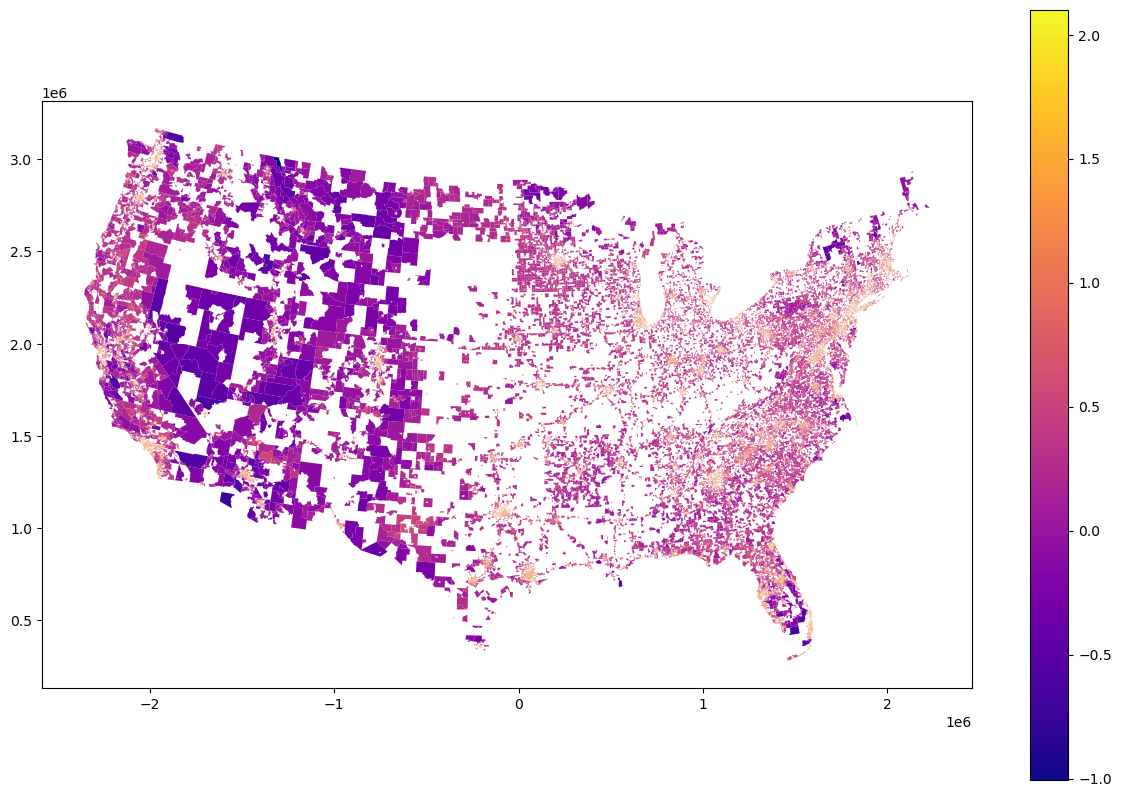

In [6]:
# Coloring by D3A (total road network density)
gdf_no2020_gt3crashes_train.plot(
    column="D3A", 
    legend=True,
    cmap="plasma",
    figsize=(15,10)
    )

<Axes: >

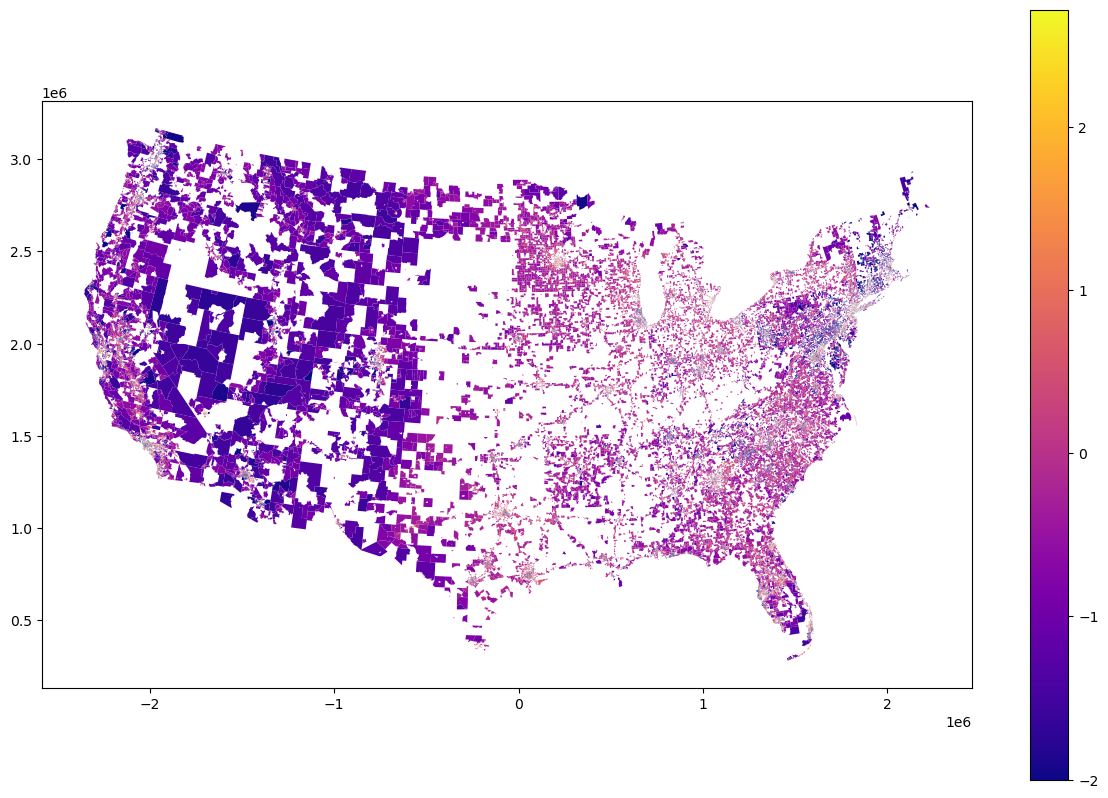

In [7]:
# Coloring by D3BAO (auto-oriented intersection density)
gdf_no2020_gt3crashes_train.plot(
    column="D3BAO", 
    legend=True,
    cmap="plasma",
    figsize=(15,10)
    )

<Axes: >

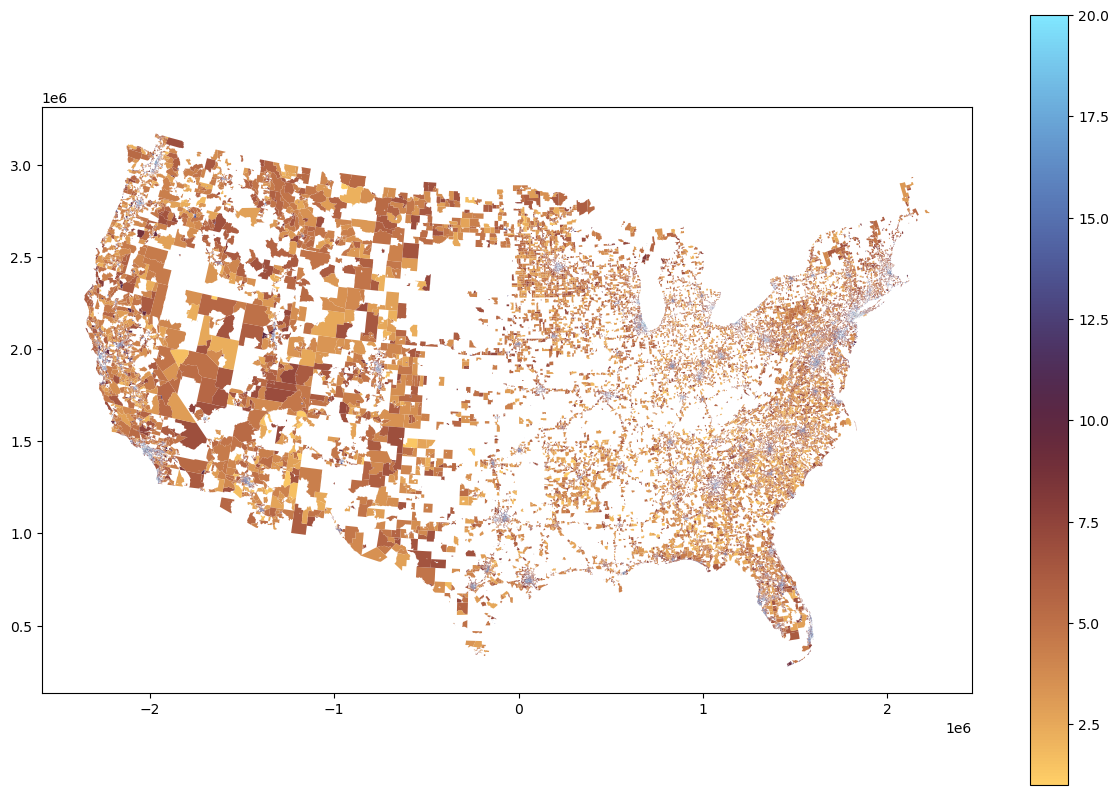

In [8]:
# Coloring by National Walkability Index
gdf_no2020_gt3crashes_train.plot(
    column="NatWalkInd", 
    legend=True,
    cmap="managua",
    figsize=(15,10)
    )